In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker

import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels
import pyrepseq.plotting as prsp

import scipy.stats

datadir = '../../../code/maxent/data'
figdatadir = './'

k=9

In [16]:
uniform_matrix =  np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k))

In [17]:
malaria_independent_params = np.load(f'{datadir}/Malaria_independent_k9_params.npz')

In [33]:
human_independent_params = np.load(f'{datadir}/Human_independent_k9_params.npz')
human_independent_params

NpzFile '../../../code/maxent/data/Human_independent_k9_params.npz' with keys: f

In [41]:
shuffled_array = malaria_independent_params['f'].copy()
shuffled_again = malaria_independent_params['f'].copy()
np.random.shuffle(shuffled_array)
np.random.shuffle(shuffled_again)

In [54]:
malaria_alt = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=malaria_independent_params['f'])


In [42]:
shuffled_matrix = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=shuffled_array)
shuffled_matrix_2 = np.random.choice(np.arange(0, len(aminoacids), 1), size=(1000000, k), p=shuffled_again)

In [22]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [23]:
def mat_to_dist(A, size=100000):
    sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [24]:
models = [
'Humanviruses_independent',
'Humanviruses_nskewfcov',
'Humanviruses_train',
'Malaria_independent',
'Malaria_ncov',
'Malaria_nskew',
'Malaria_nskewfcov',
'Malaria_train',
'Malaria_test',
'Mouse_train'
]

In [25]:
ns_dict = {}
ps_dict = {}
for model in models:
    df = pd.read_csv(f'{datadir}/{model}_distance_to_self.csv',names=['0', '1', '2', '3+'])
    ns_dict[model] = np.array(df.loc['N'].values)
    ps_dict[model] = np.array(df.loc['P'].values)

In [26]:
ns_dict['uniform'] = mat_to_dist(uniform_matrix)
ps_dict['uniform'] = ns_dict['uniform']/np.sum(ns_dict['uniform'])
ps_dict['uniform'][0] = len(reference)/20**k

In [55]:
ns_dict['malaria_alt'] = mat_to_dist(malaria_alt)
ps_dict['malaria_alt'] = ns_dict['malaria_alt']/np.sum(ns_dict['malaria_alt'])

In [58]:
ns_dict

{'Humanviruses_independent': array([np.float64(15.0), np.float64(1288.0), np.float64(43223.0),
        '55474.0'], dtype=object),
 'Humanviruses_nskewfcov': array([np.float64(76.0), np.float64(2593.0), np.float64(47232.0),
        '50099.0'], dtype=object),
 'Humanviruses_train': array([np.float64(154.0), np.float64(2838.0), np.float64(47800.0),
        '49208.0'], dtype=object),
 'Malaria_independent': array([np.float64(5.0), np.float64(808.0), np.float64(33737.0), '65450.0'],
       dtype=object),
 'Malaria_ncov': array([np.float64(15.0), np.float64(1183.0), np.float64(36401.0),
        '62401.0'], dtype=object),
 'Malaria_nskew': array([np.float64(76.0), np.float64(1567.0), np.float64(37096.0),
        '61261.0'], dtype=object),
 'Malaria_nskewfcov': array([np.float64(78.0), np.float64(1677.0), np.float64(37344.0),
        '60901.0'], dtype=object),
 'Malaria_train': array([np.float64(398.0), np.float64(2437.0), np.float64(37973.0),
        '59192.0'], dtype=object),
 'Malaria_test'

In [43]:
ns_dict['shuffled_independent'] = mat_to_dist(shuffled_matrix)
ps_dict['shuffled_independent'] = ns_dict['shuffled_independent']/np.sum(ns_dict['shuffled_independent'])

ns_dict['shuffled_independent2'] = mat_to_dist(shuffled_matrix_2)
ps_dict['shuffled_independent2'] = ns_dict['shuffled_independent2']/np.sum(ns_dict['shuffled_independent2'])

Text(0.5, 1.0, '$R^2 = 0.01$')

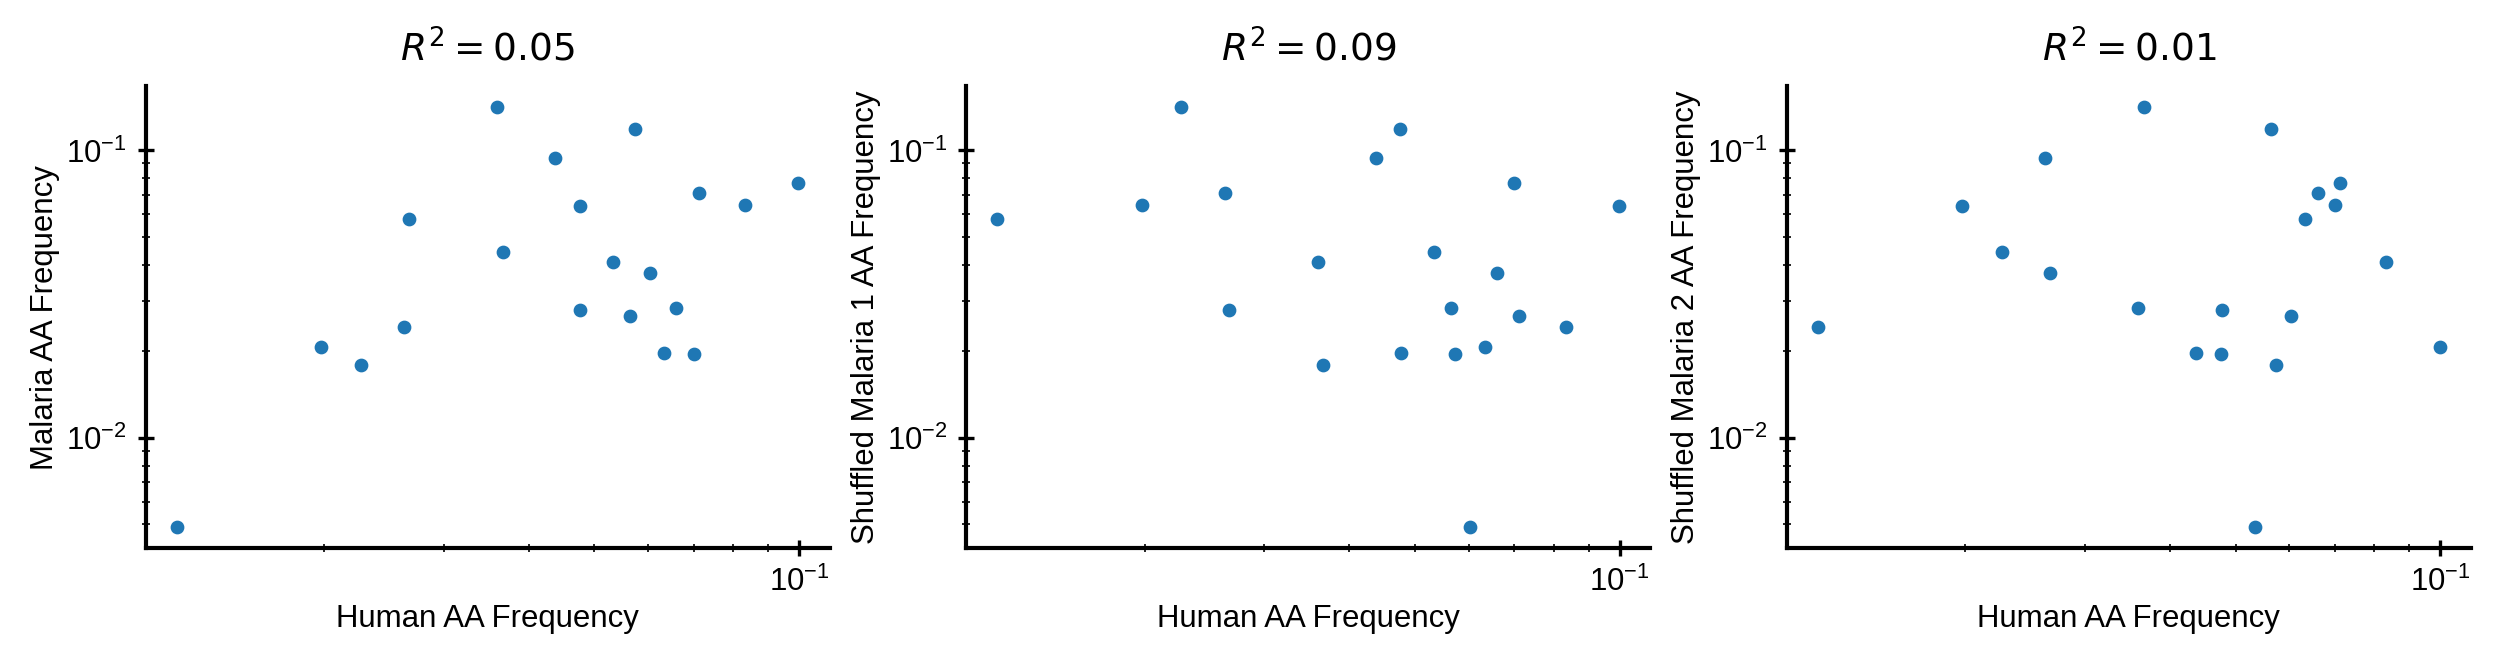

In [53]:
fig, ax = plt.subplots(figsize=(10, 2), nrows=1, ncols=3)


m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'], malaria_independent_params['f'])
ax[0].scatter(human_independent_params['f'],malaria_independent_params['f'])
ax[0].set_ylabel('Malaria AA Frequency')
ax[0].set_xlabel('Human AA Frequency')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title(f'$R^2 = {round(r_value**2,2)}$')

m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_array)

ax[1].scatter(human_independent_params['f'],shuffled_array)
ax[1].set_ylabel('Shuffled Malaria 1 AA Frequency')
ax[1].set_xlabel('Human AA Frequency')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title(f'$R^2 = {round(r_value**2,2)}$')


m, b, r_value, p_value, std_err = scipy.stats.linregress(human_independent_params['f'],shuffled_again)

ax[2].scatter(human_independent_params['f'],shuffled_again)
ax[2].set_ylabel('Shuffled Malaria 2 AA Frequency')
ax[2].set_xlabel('Human AA Frequency')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_title(f'$R^2 = {round(r_value**2,2)}$')


# plt.scatter(malaria_independent_params['f'],shuffled_array)

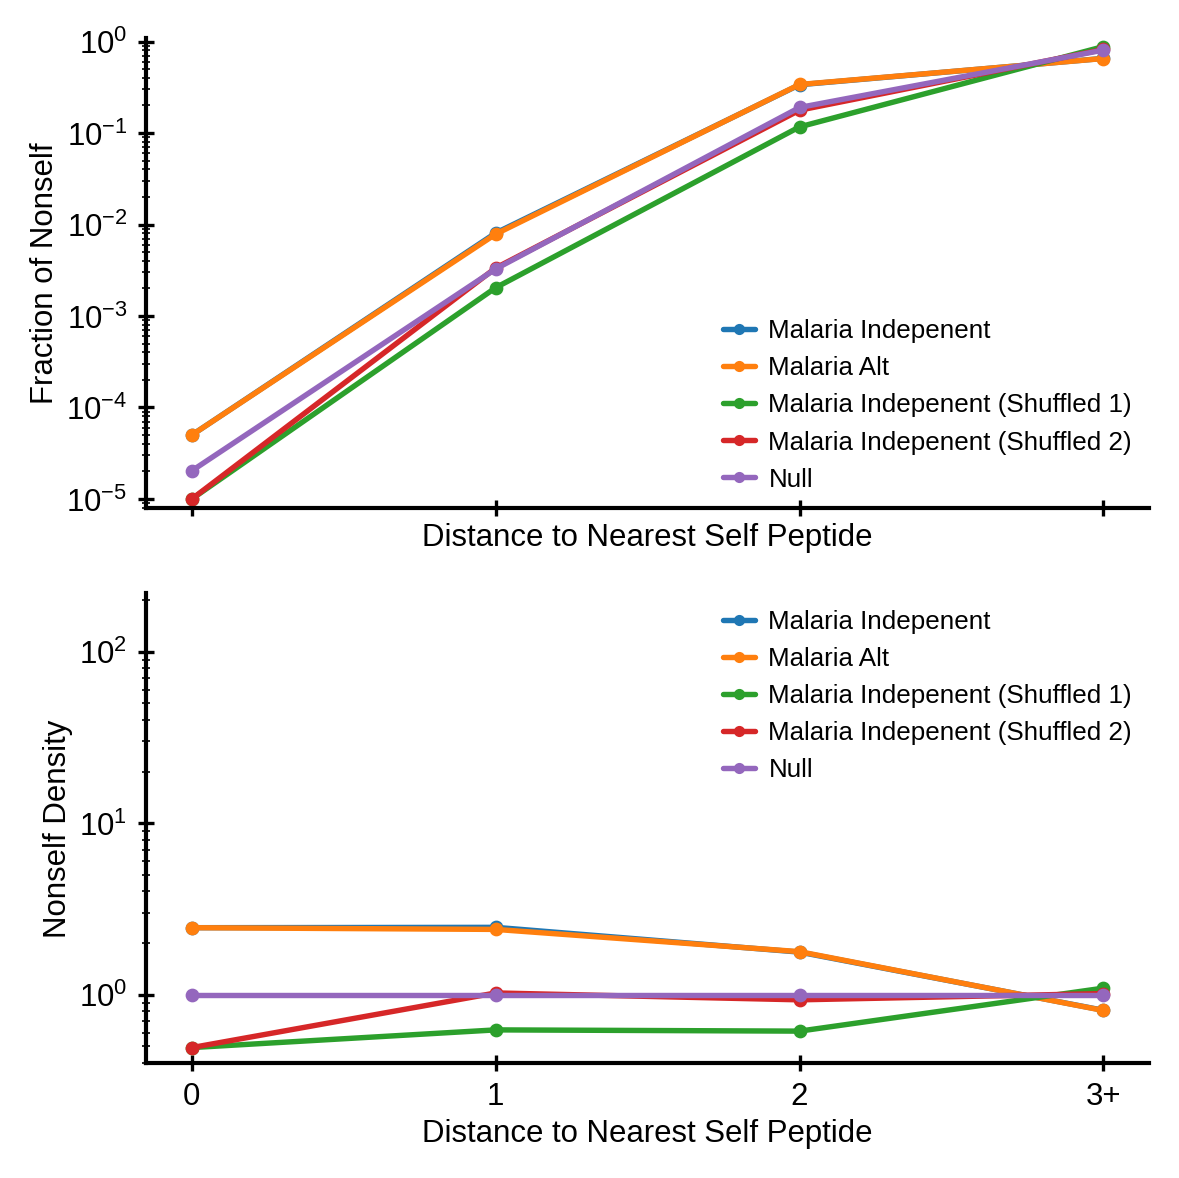

In [59]:
fig, axes = plt.subplots(figsize=(4, 4), nrows=2, ncols=1, sharex=True)


model_to_label = {
    'Malaria_independent': 'Malaria Indepenent',
    'malaria_alt': 'Malaria Alt',
    'shuffled_independent': 'Malaria Indepenent (Shuffled 1)',
    'shuffled_independent2': 'Malaria Indepenent (Shuffled 2)',
    'uniform': 'Null'
}
for model in ['Malaria_independent','malaria_alt', 'shuffled_independent', 'shuffled_independent2', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels([0, 1, 2, '3+'])
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0].set_ylim(8e-6, 1.1)
axes[1].set_yticks([1e0, 1e1, 1e2])
axes[1].set_ylim(4e-1, 2.2e2)
axes[0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[0].set_xlabel('Distance to Nearest Self Peptide')
axes[1].set_xlabel('Distance to Nearest Self Peptide')

axes[0].legend()
axes[1].legend()


fig.tight_layout()

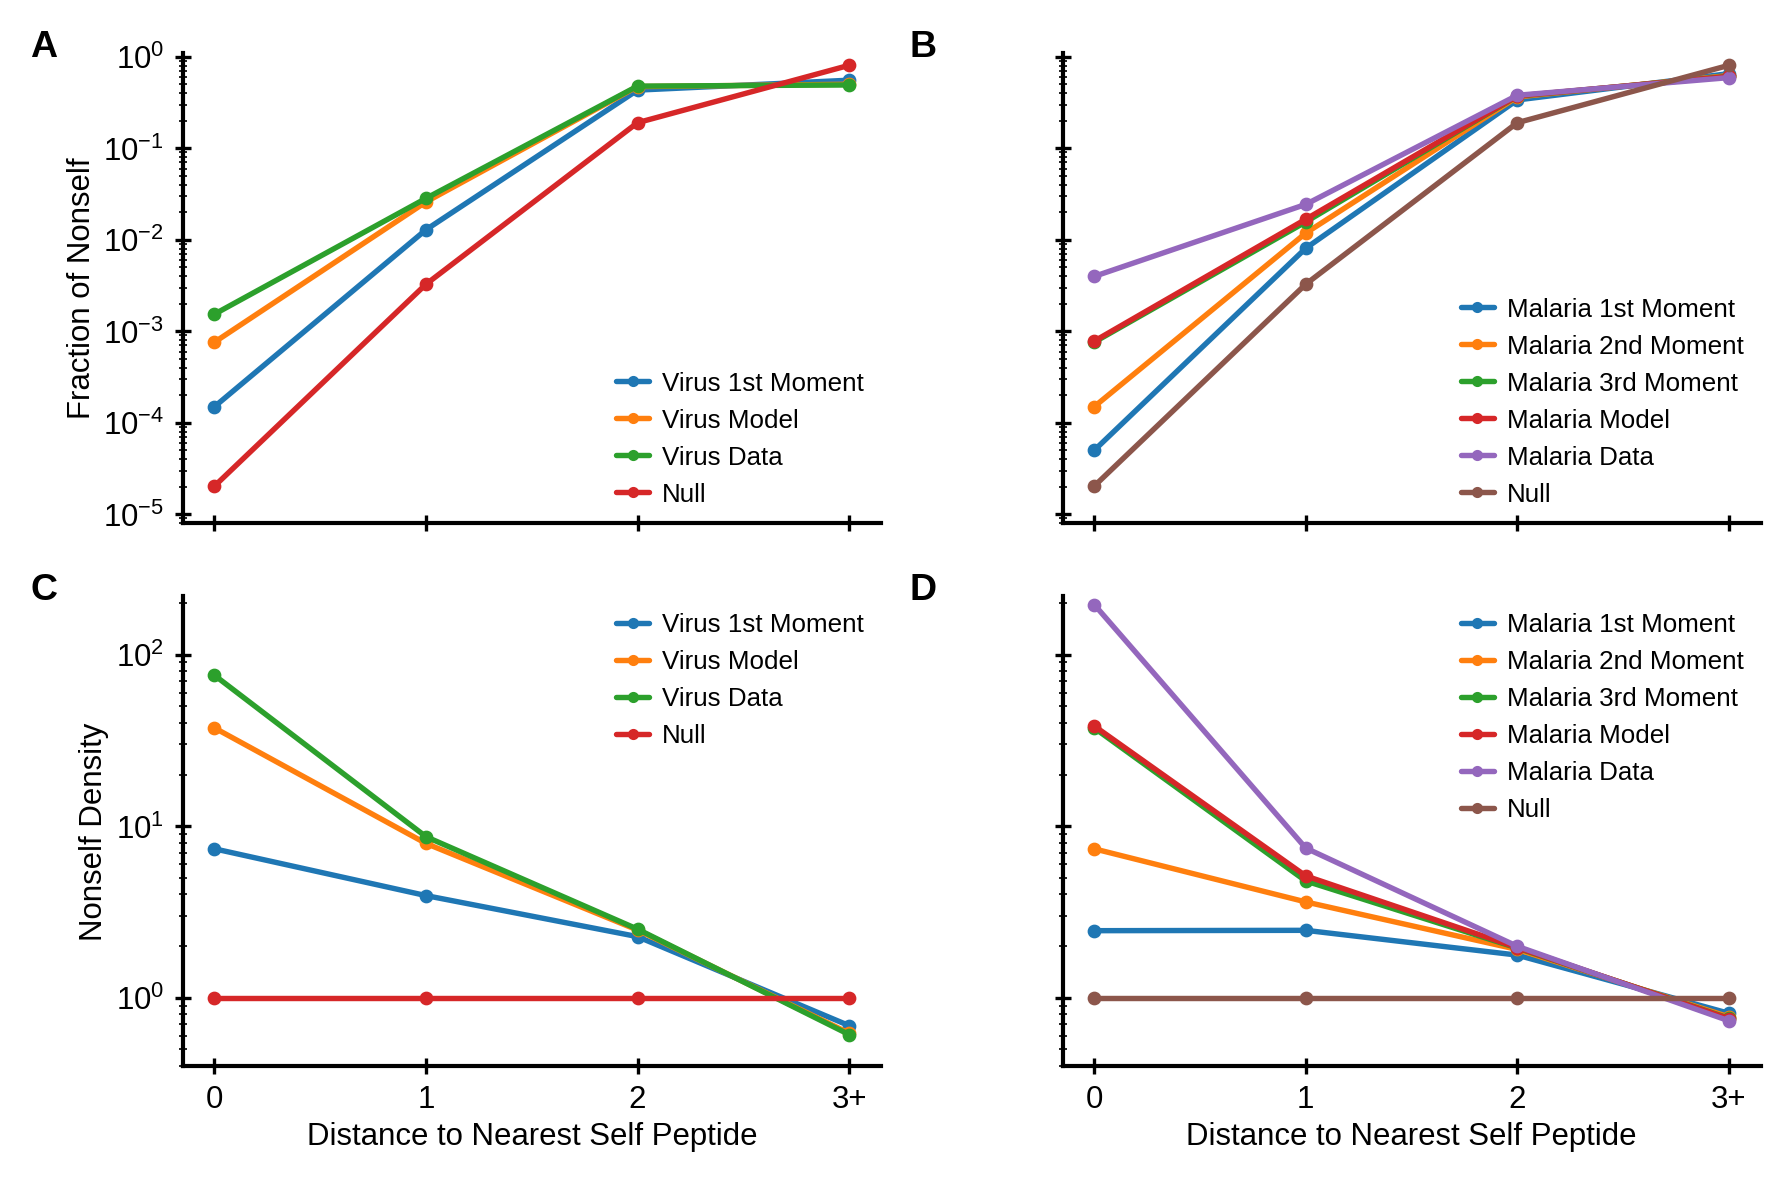

In [48]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

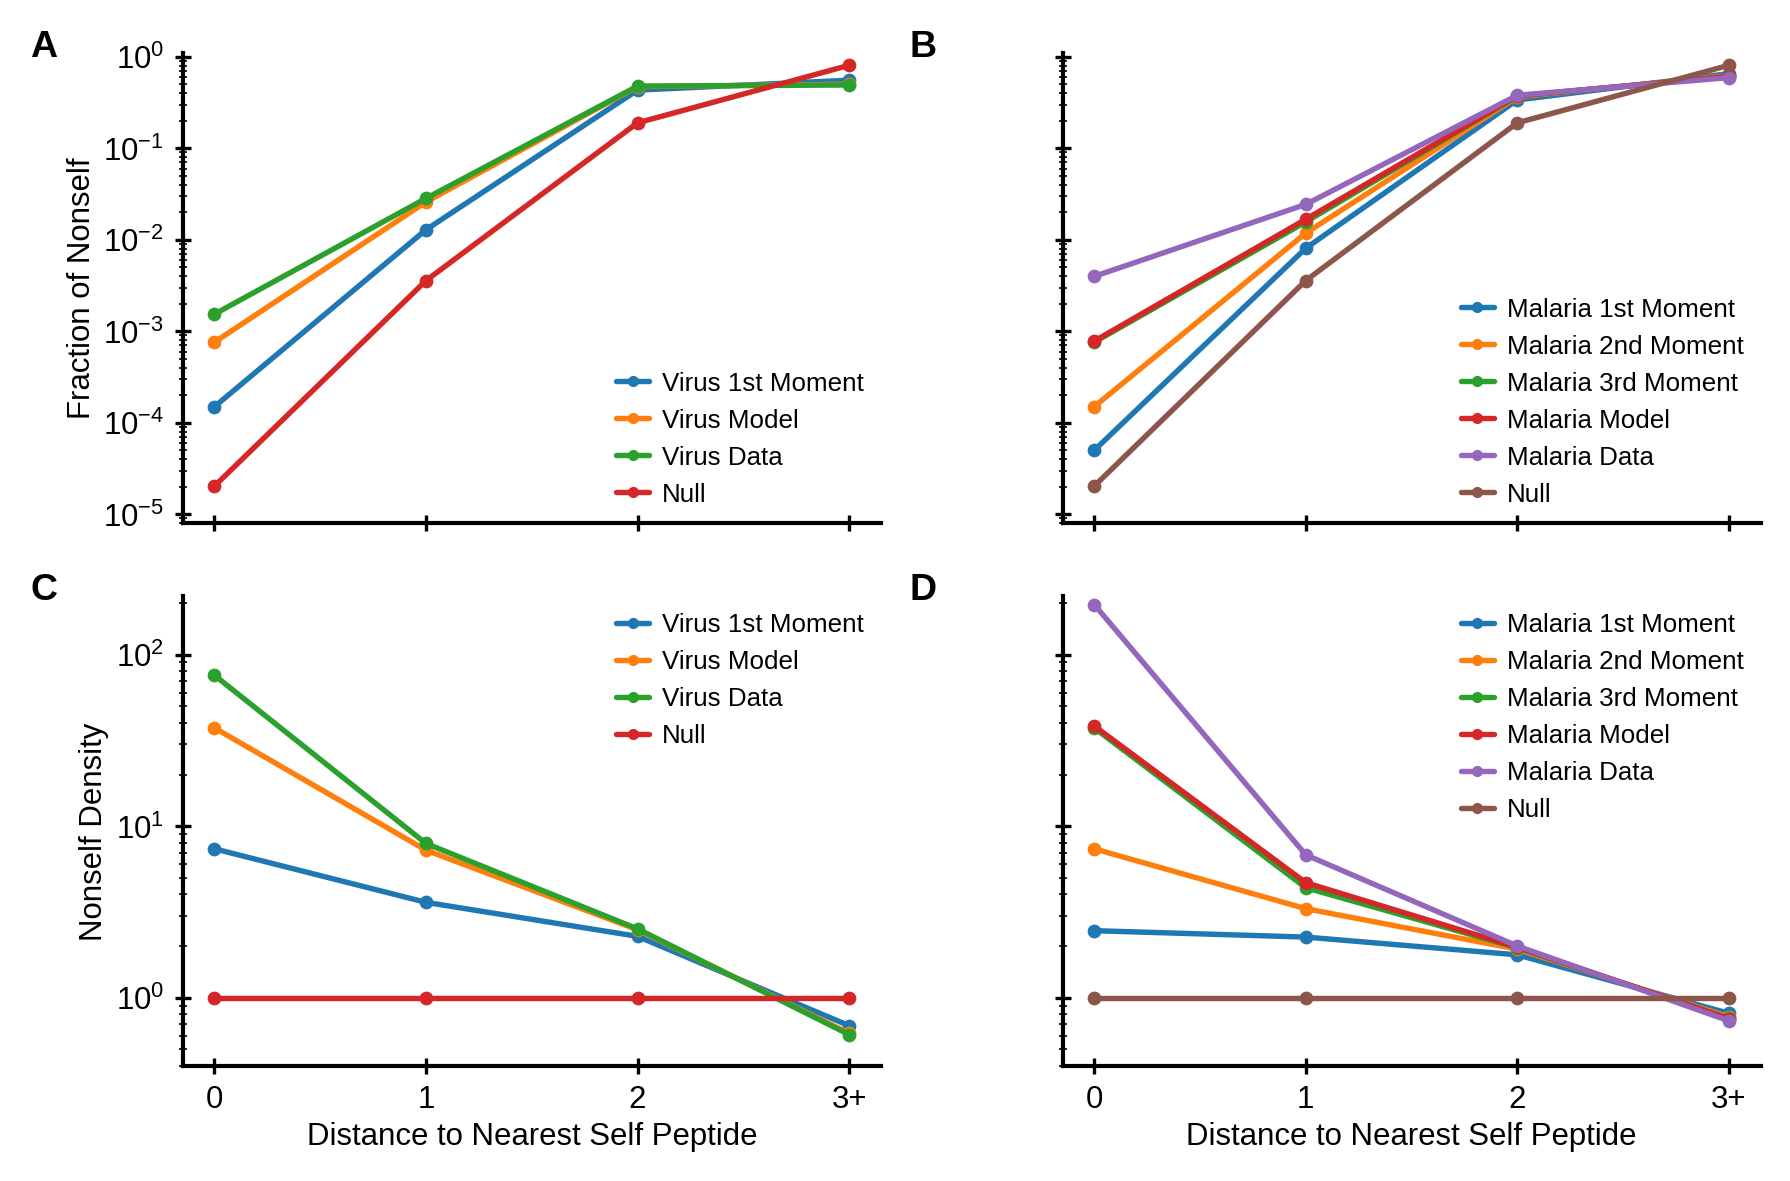

In [43]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_independent': 'Virus 1st Moment',
    'Humanviruses_nskewfcov': 'Virus Model',
    'Humanviruses_train': 'Virus Data',
    'Malaria_independent': 'Malaria 1st Moment',
    'Malaria_ncov': 'Malaria 2nd Moment',
    'Malaria_nskew': 'Malaria 3rd Moment',
    'Malaria_nskewfcov': 'Malaria Model',
    'Malaria_train': 'Malaria Data',
    'Malaria_test': 'Malaria Train Data',
    'Mouse_train': 'Mouse Data',
    'uniform': 'Null'
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_independent', 'Humanviruses_nskewfcov', 'Humanviruses_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_independent', 'Malaria_ncov', 'Malaria_nskew',
              'Malaria_nskewfcov', 'Malaria_train', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')]

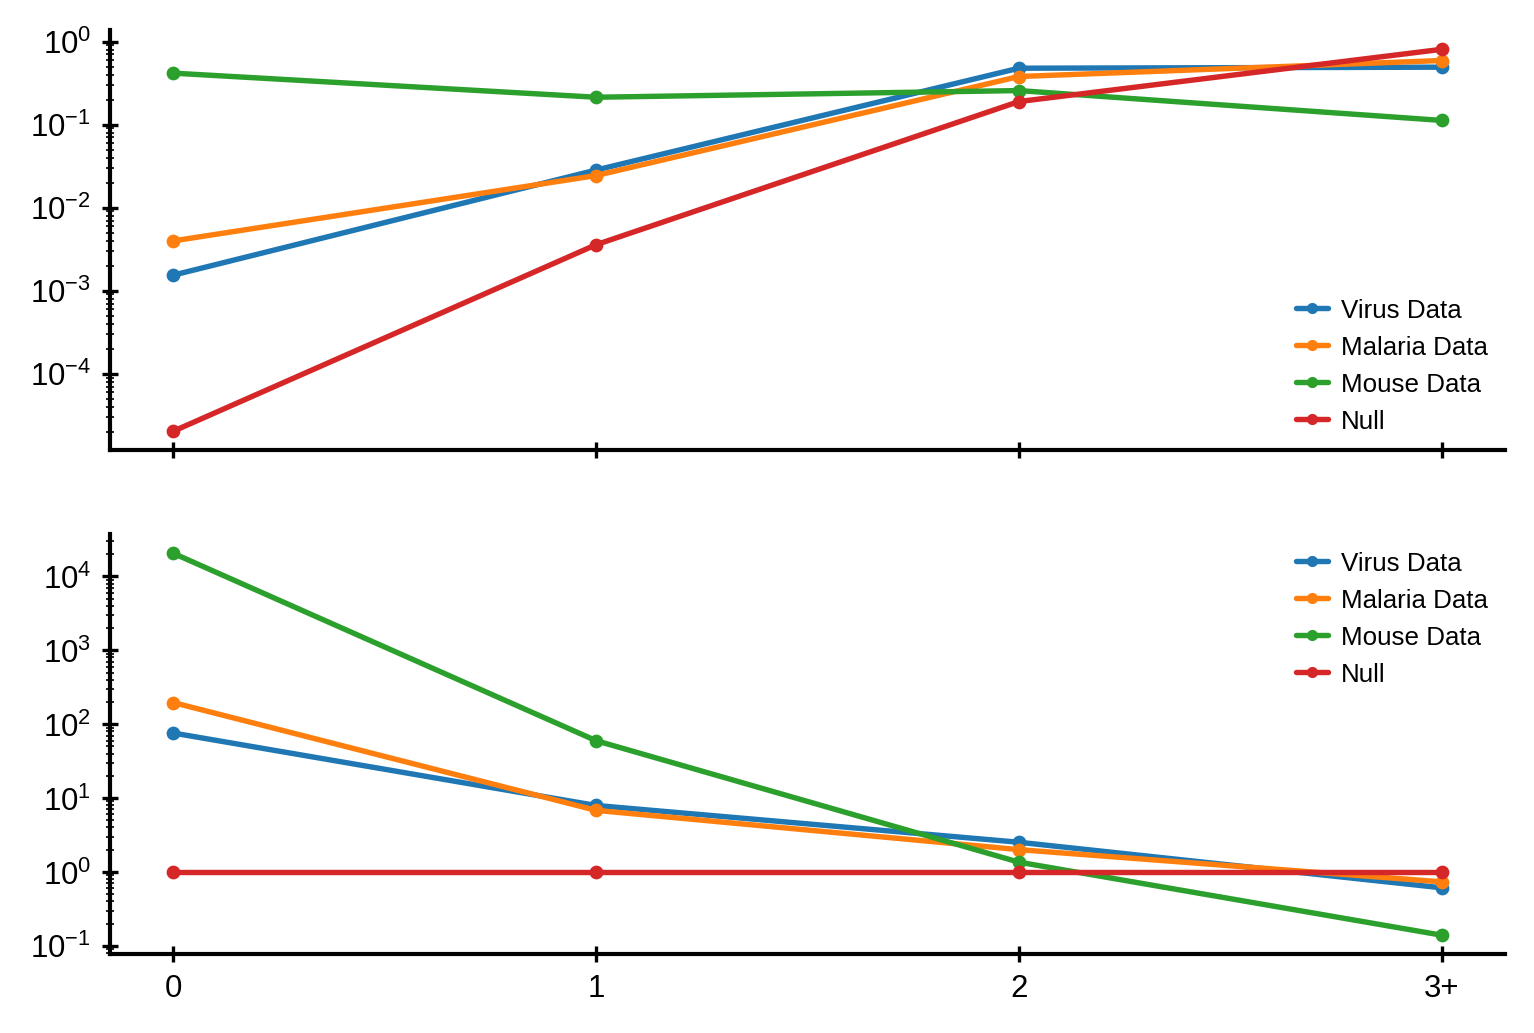

In [38]:
fig, ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=1,sharex=True)
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train','Malaria_train','Mouse_train','uniform']:
    ps = ps_dict[model].astype(np.float64)
    ax[0].plot(range(4), ps, '-o', label=model_to_label[model])
    ax[1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([0, 1, 2, '3+'])



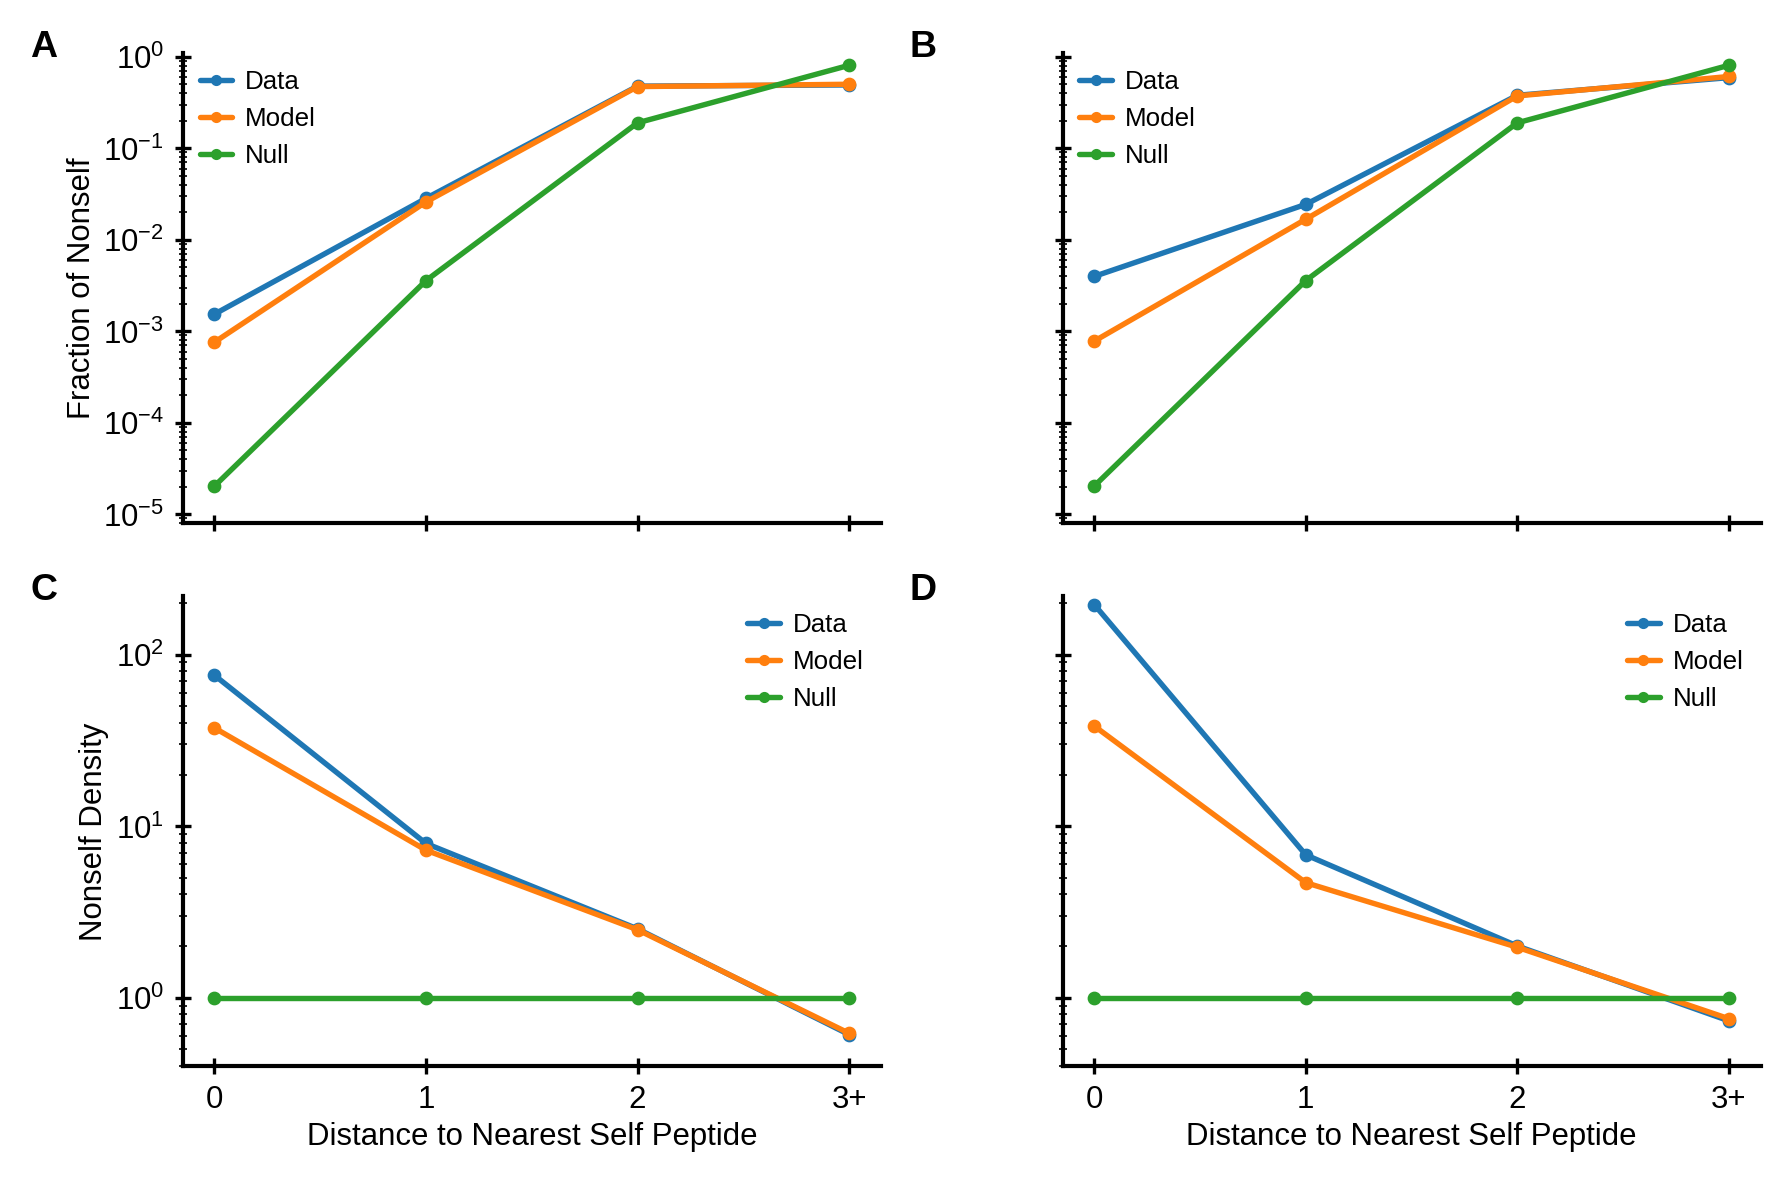

In [42]:
fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, sharex=True, sharey='row')

model_to_label = {
    'Humanviruses_nskewfcov': 'Model',
    'Humanviruses_train': 'Data',
    'Malaria_nskewfcov': 'Model',
    'Malaria_train': 'Data',
    'uniform': 'Null'
    
}

# for i, ax in enumerate(axes.flatten()[:2]):
#     ax.axis("off")
#     ax.set_title("Columntitle {}".format(i+1), fontweight='bold')
    
ps_flat = ps_dict['uniform']
for model in ['Humanviruses_train', 'Humanviruses_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,0].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,0].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,0].set_title('Human Viruses')
    

for model in ['Malaria_train', 'Malaria_nskewfcov', 'uniform']:
    ps = ps_dict[model].astype(np.float64)
    axes[0,1].plot(range(4), ps, '-o', label=model_to_label[model])
    axes[1,1].plot(range(4), ps/ps_flat, '-o', label=model_to_label[model])
#     axes[0,1].set_title('P. Falciparum')

for ax in axes.reshape(-1):
    ax.set_yscale('log')
    ax.legend()
# axes[0,0].set_yscale('log')
# axes[1,0].set_yscale('log')
# axes[0,1].set_yscale('log')
# axes[1,1].set_yscale('log')

axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels([0, 1, 2, '3+'])
axes[1,1].set_xticks([0, 1, 2, 3])
axes[1,1].set_xticklabels([0, 1, 2, '3+'])

axes[0,0].set_ylim(8e-6, 1.1)
axes[0,0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[0,1].set_ylim(8e-6, 1.1)
axes[0,1].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1,0].set_yticks([1e0, 1e1, 1e2])
axes[1,0].set_ylim(4e-1, 2.2e2)
axes[1,1].set_yticks([1e0, 1e1, 1e2])
axes[1,1].set_ylim(4e-1, 2.2e2)
axes[0,0].set_ylabel('Fraction of Nonself')
# axes[0,0].legend(loc='lower right')
axes[1,0].set_ylabel('Nonself Density')
# axes[0,1].legend(loc='upper right',bbox_to_anchor=(1.5,1),fontsize=12)

axes[1,0].set_xlabel('Distance to Nearest Self Peptide')
axes[1,1].set_xlabel('Distance to Nearest Self Peptide')
prsp.label_axes(fig, xy=(-0.18, 1.05), va='top', ha='right')


fig.tight_layout()
plt.savefig('../fig3_not_annotated.png')
plt.savefig('../fig3_not_annotated.svg')